In [1]:
%%html
<style type='text/css'>
.CodeMirror{
font-family: 'Consolas';
font-size: 12px;
</style>

In [2]:
import os
os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")
os.add_dll_directory("C:/Program Files/NVIDIA/CUDNN/v8.3/bin")


<AddedDllDirectory('C:/Program Files/NVIDIA/CUDNN/v8.3/bin')>

In [4]:
import tensorflow as tf

In [13]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
devices = sess.list_devices()

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5



In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/ 255.0, x_test / 255.0

In [11]:
print(x_train.shape)

(60000, 28, 28)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2953 - accuracy: 0.9155 - val_loss: 0.1425 - val_accuracy: 0.9581
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1398 - accuracy: 0.9583 - val_loss: 0.1013 - val_accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1091 - accuracy: 0.9666 - val_loss: 0.0889 - val_accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0863 - accuracy: 0.9728 - val_loss: 0.0795 - val_accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0731 - accuracy: 0.9770 - val_loss: 0.0793 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0638 - accuracy: 0.9796 - val_loss: 0.0745 - val_accuracy: 0.9758
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0561 - accuracy: 0.9821 - val_loss: 0.0705 - val_accuracy:

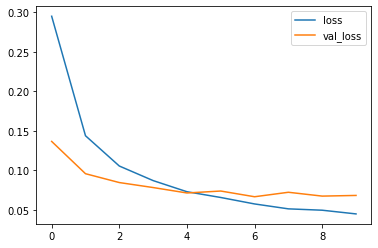

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

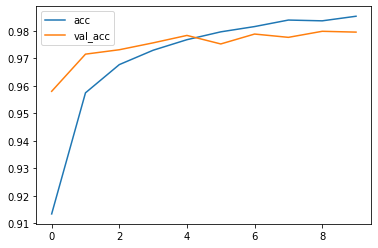

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [26]:
p_test = model.predict(x_test).argmax(axis=1)
#p_test = model.predict(x_test)
#print(p_test.shape)

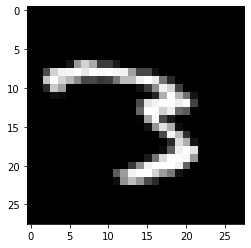

In [23]:
import numpy as np
mis_idx = np.where(p_test != y_test)[0]
i = np.random.choice(mis_idx)
plt.imshow(x_test[i], cmap='gray')